# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


1. Get the total rides for each city type

In [5]:
# To get the number of rides for each city by each type of city,
# create a Series where the index is the name of city and 
# the column is the number of rides for that city.

In [6]:
# NOTE: 

# To create a DataSeries with one of the columns in a DataFrame
# we can use the groupby() function 
# and add the column inside the parentheses.

# Using the groupby() function can be used to group large amounts of
# data when we want to compute mathematical operations on thses groups.

In [7]:
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

2. Get the total drivers for each city type

In [8]:
# To get the average number of drivers for each city in the urban, suburban, and rural cities
# We can use the groupby() function and get the mean() of the driver_count column.

In [9]:
# Get the average number of drivers for each urban city.
# urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# urban_driver_count.head()

In [10]:
# Get the total drivers for each city type
type_drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]

type_drivers_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

3. Get the total amount of fares for each city type

In [11]:
# Using the separate DataFrames for each city type, we can calculate the
# average fare for each city in the urban, suburban, and rural cities.

# Using the groupby() function, we can chain the mean() method to get the
# averages of the fare column.

In [12]:
# Get the total amount of fares for each city type
city_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

city_total_fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

4. Get the average fare per ride for each city type.

In [13]:
avg_fare_per_ride = city_total_fare / type_rides_count
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

5. Get the average fare per driver for each city type.

In [14]:
# pyber_data_df.groupby("type").sum()["fare"]/city_data_df.groupby("type").sum()["driver_count"]

avg_fare_per_driver = city_total_fare / type_drivers_count
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

6. Create a PyBer summary DataFrame.

In [15]:
summary_df = pd.DataFrame({"Total Rides": type_rides_count, 
    "Total Drivers": type_drivers_count,
    "Total Fares": city_total_fare,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


7. Cleaning up the DataFrame. Delete the index name


In [16]:
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


8. Format the columns.

In [17]:
# Not graphing, just adding dollar signs

In [18]:
#summary_df["Total Rides"]=summary_df["Total Rides"].map("{:,.0f})".format                                                                   

#summary_df["Total Drivers"]=summary_df["Total Drivers"].map("{:,.0f})".format
#summary_df["Total Fares"]=summary_df["Total Fares"].map("{:,.0f})".format
#summary_df["Average Fare per Ride"]=summary_df["Average Fare per Ride"].map("{:,.0f})".format
#summary_df["Average Fare per Driver"]=summary_df["Average Fare per Driver"].map("{:,.0f})".format

#summary_df

In [19]:
# Calculate the measures of central tendency for the average fare for the urban cities.
#mean_urban_fares = np.mean(urban_fares)
#print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

#median_urban_fares = np.median(urban_fares)
#print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

#mode_urban_fares = sts.mode(urban_fares)
#print(f"The mode fare price for urban trips is {mode_urban_fares}.")

In [20]:
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:}".format)

summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)       

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

1. Read the merged DataFrame

In [21]:
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


2. Using groupby() to create a new DataFrame showing the sum of the fares 
for each date where the indices are the city type and date.

In [22]:
#country_sum_profit = produce_df.groupby(["Country", "Date"]).sum()[["Profit"]]
#country_sum_profit.tail(10)

In [23]:
city_sum_fare = pyber_data_df.groupby(["city", "type", "date"]).sum()[["fare"]]
city_sum_fare.head()

fare
city        type  date                      
Amandaburgh Urban 2019-01-02 09:57:04  33.06
                  2019-01-11 02:22:07  29.24
                  2019-01-13 16:04:10  23.35
                  2019-01-21 04:12:54   9.26
                  2019-01-29 23:28:12  41.06

3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index

In [24]:
# country_sum_profit = country_sum_profit.reset_index()
# country_sum_profit.tail(10)

In [25]:
city_sum_fare = pyber_data_df.reset_index()
city_sum_fare.head()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare'       

In [26]:
# country_sum_profit_pivot = country_sum_profit.pivot(index="Date", columns="Country", values="Profit")
# country_sum_profit_pivot.tail(10)
city_sum_fare_pivot = pyber_data_df.pivot(index="date", columns="type", values="fare")
city_sum_fare_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

In [27]:
# use the loc function to get the dates between ''2019-01-01':'2019-04-29''

In [28]:
# study example
# mydata.loc['date1':'date10']

# My example
# ride_share_data.loc['2019-01-01':'2019-04-29']

In [29]:
# Can only make dates until 04-28. If I make the date until 04-29 the line graph shows until May, not April. (Directions expects the month of April not Martch.)
city_sum_fare_pivot = city_sum_fare_pivot.loc['2019-01-01':'2019-04-28']
city_sum_fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8. 
df.index = pd.to_datetime(df.index)

In [30]:
# country_sum_profit_pivot.index = pd.to_datetime(country_sum_profit_pivot.index)
# country_sum_profit_pivot
city_sum_fare_pivot.index = pd.to_datetime(city_sum_fare_pivot.index)
city_sum_fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


7. Check that the datatype for the index is datetime using df.info()


In [31]:
# country_sum_profit_pivot.info()
city_sum_fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [32]:
# country_sum_profit_day = country_sum_profit_pivot.resample("D").sum()
# country_sum_profit_day.head(10)

In [33]:
city_sum_fare_day = city_sum_fare_pivot.resample("w").sum()
city_sum_fare_day

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

In [34]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

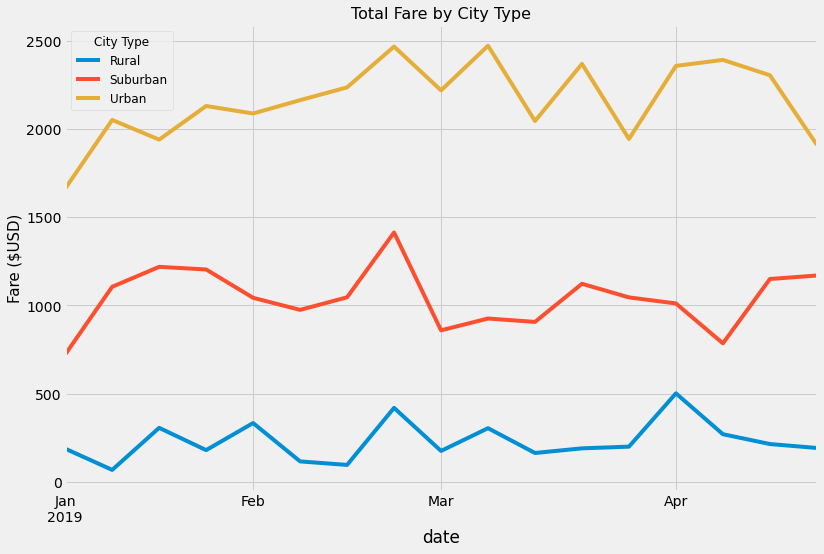

In [35]:
city_sum_fare_day.plot(figsize=(12, 8))

plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=15)

lgnd = plt.legend(fontsize="12", title="City Type")
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/PyBer_summary.png")

# Show figure 
plt.show()

